# Logistic Regression

#### Module Check
- matplotlib
- sklearn
- numpy
- pandas

In [1]:
from sklearn.datasets import load_iris                                 # Import the dataset
from sklearn import tree                                               # Visualize the decision tree
from sklearn.linear_model import LogisticRegression                    # Import Logistic Regression
from sklearn.preprocessing import LabelEncoder                         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease.csv')

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,16.10,Yes,No,Yes,0,30,No,Male,40-44,Other,No,Yes,Fair,5,No,No,No
1,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
2,No,17.47,No,No,No,0,0,No,Female,80 or older,White,No,Yes,Good,8,No,No,Yes
3,No,17.71,No,No,No,0,10,No,Female,65-69,Asian,No,Yes,Good,6,No,No,No
4,No,18.13,No,No,No,0,0,No,Male,80 or older,White,No,Yes,Excellent,8,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,No,46.87,Yes,Yes,No,0,3,No,Female,40-44,Black,No,No,Good,8,No,No,No
396,Yes,51.54,No,No,Yes,30,2,Yes,Male,60-64,White,Yes,No,Poor,7,No,No,No
397,Yes,53.16,Yes,No,Yes,30,1,Yes,Female,45-49,Black,Yes,No,Poor,6,No,No,No
398,Yes,55.85,No,No,No,30,0,No,Male,60-64,White,Yes,No,Fair,6,No,No,No


In [3]:
# Example of one-hot encoding

gender = pd.get_dummies(df.Gender, prefix='Gender')

print(gender)

new_df = df.drop('Gender',axis=1)
new_df = pd.concat([new_df, gender], axis=1) # Add the new encoded features

new_df

     Gender_Female  Gender_Male
0            False         True
1             True        False
2             True        False
3             True        False
4            False         True
..             ...          ...
395           True        False
396          False         True
397           True        False
398          False         True
399          False         True

[400 rows x 2 columns]


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Gender_Female,Gender_Male
0,Yes,16.10,Yes,No,Yes,0,30,No,40-44,Other,No,Yes,Fair,5,No,No,No,False,True
1,No,16.60,Yes,No,No,3,30,No,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,True,False
2,No,17.47,No,No,No,0,0,No,80 or older,White,No,Yes,Good,8,No,No,Yes,True,False
3,No,17.71,No,No,No,0,10,No,65-69,Asian,No,Yes,Good,6,No,No,No,True,False
4,No,18.13,No,No,No,0,0,No,80 or older,White,No,Yes,Excellent,8,No,No,Yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,No,46.87,Yes,Yes,No,0,3,No,40-44,Black,No,No,Good,8,No,No,No,True,False
396,Yes,51.54,No,No,Yes,30,2,Yes,60-64,White,Yes,No,Poor,7,No,No,No,False,True
397,Yes,53.16,Yes,No,Yes,30,1,Yes,45-49,Black,Yes,No,Poor,6,No,No,No,True,False
398,Yes,55.85,No,No,No,30,0,No,60-64,White,Yes,No,Fair,6,No,No,No,False,True


In [4]:
# Idnetify all the categorical variables in the data

cat_features = df.select_dtypes(include = "object").columns
print (cat_features)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Gender', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [5]:
#Label Encoding for object to numeric conversion

le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))
    #df[feat] = df[feat].astype(int)
    
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      400 non-null    int32  
 1   BMI               400 non-null    float64
 2   Smoking           400 non-null    int32  
 3   AlcoholDrinking   400 non-null    int32  
 4   Stroke            400 non-null    int32  
 5   PhysicalHealth    400 non-null    int64  
 6   MentalHealth      400 non-null    int64  
 7   DiffWalking       400 non-null    int32  
 8   Gender            400 non-null    int32  
 9   AgeCategory       400 non-null    int32  
 10  Race              400 non-null    int32  
 11  Diabetic          400 non-null    int32  
 12  PhysicalActivity  400 non-null    int32  
 13  GenHealth         400 non-null    int32  
 14  SleepTime         400 non-null    int64  
 15  Asthma            400 non-null    int32  
 16  KidneyDisease     400 non-null    int32  
 1

In [6]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,16.10,1,0,1,0,30,0,1,3,4,0,1,1,5,0,0,0
1,0,16.60,1,0,0,3,30,0,0,6,5,2,1,4,5,1,0,1
2,0,17.47,0,0,0,0,0,0,0,11,5,0,1,2,8,0,0,1
3,0,17.71,0,0,0,0,10,0,0,8,1,0,1,2,6,0,0,0
4,0,18.13,0,0,0,0,0,0,1,11,5,0,1,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,46.87,1,1,0,0,3,0,0,3,2,0,0,2,8,0,0,0
396,1,51.54,0,0,1,30,2,1,1,7,5,2,0,3,7,0,0,0
397,1,53.16,1,0,1,30,1,1,0,4,2,2,0,3,6,0,0,0
398,1,55.85,0,0,0,30,0,0,1,7,5,2,0,1,6,0,0,0


In [7]:
# Create class(y) and features(X) from the dataset

y = df['HeartDisease']
X = df.drop('HeartDisease',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# scale numeric columns and perform the logistic regression

logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [9]:
# Logistic Regression

logclf = logistic_pipeline
logclf.fit(X_train, y_train)
y_pred = logclf.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43 18]
 [17 42]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        61
           1       0.70      0.71      0.71        59

    accuracy                           0.71       120
   macro avg       0.71      0.71      0.71       120
weighted avg       0.71      0.71      0.71       120



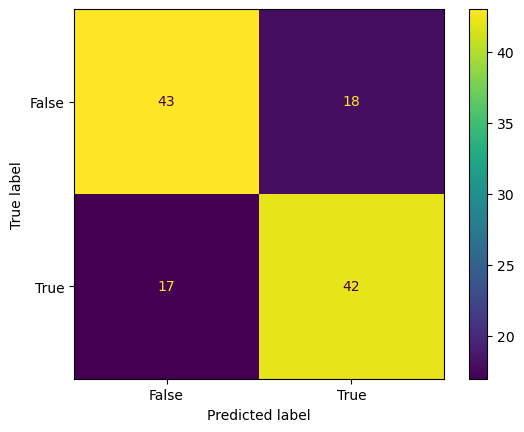

In [11]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

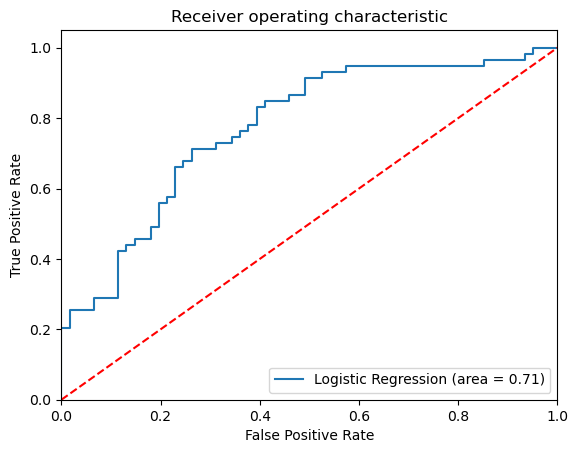

In [12]:
logit_roc_auc = roc_auc_score(y_test, logclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logclf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [13]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.708333
Precision: 0.700000
Recall: 0.711864
F1 score: 0.705882


In [14]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

c:\Users\gudev\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
grid_result.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}